In [44]:
import cv2
import os
import matplotlib.pyplot as plt
from time import time,sleep

from googleapiclient.discovery import build
from google.oauth2 import service_account
from googleapiclient.http import MediaIoBaseUpload
import io

In [45]:
SCOPES = ['https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = 'siamuniversity-77050aa882ce.json'
PARENT_FOLDER_ID = "1Y9IGBm1-03rV4LQv7J69G6K4sA9rL3FM"

def authenticate():
    creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    return creds

def upload_photo(file_path):
    # print(file_path.split('\\')[-1])
    creds = authenticate()
    service = build('drive','v3',credentials=creds)

    file_metadata = {
        'name':file_path.split('\\')[-1],
        'parents':[PARENT_FOLDER_ID]
    }

    file = service.files().create(
        body = file_metadata,
        media_body = file_path
    ).execute()


In [46]:
input_video_path = "C://Users//Acer//Desktop//siam project//fullvideo.mp4"
output_dir = "output_frames"
os.makedirs(output_dir, exist_ok=True)
cap = cv2.VideoCapture(input_video_path)

In [59]:
# Get framerate
Fps = int(cap.get(cv2.CAP_PROP_FPS))                   # Frame/sec     25 frame/sec
# All frame of video
Afm = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))       # video length 343 sec
# length of video
duration = Afm//Fps
# print(f"{duration} sec")
# Frame capture every x min
# Cap_every_x_min = 0.5
Cap_every_x_min = 1
Fps = 30
Fxmin = (Fps*60)*Cap_every_x_min
# Fxmin = 100


print(f"Frame rate: {Fps}")
print(f"Total frames: {Afm}")
print(f"Video duration: {duration:.2f} seconds or {duration/(Fps*2)} min")
print(f"Frames to capture every {Cap_every_x_min} minutes: {Fxmin} frame")
print(f"We're going to capture every {Fxmin} frames, which means every {Cap_every_x_min} minutes we save 1 image.")
print(f"We're gonno got {Afm//Fxmin}")

Frame rate: 30
Total frames: 161988
Video duration: 5585.00 seconds or 93.08333333333333 min
Frames to capture every 1 minutes: 1800 frame
We're going to capture every 1800 frames, which means every 1 minutes we save 1 image.
We're gonno got 89


In [60]:
def upload_photo(image_data, frame_no):
    # print(file_path.split('\\')[-1])
    creds = authenticate()
    service = build('drive','v3',credentials=creds)

    file_metadata = {
        'name':f'{frame_no}.jpg',
        'parents':[PARENT_FOLDER_ID]
    }

    media = MediaIoBaseUpload(io.BytesIO(image_data),mimetype='image/jpeg')


    file = service.files().create(
        body = file_metadata,
        media_body = media
    ).execute()

In [ ]:
# frame_to_capture = list(range(0,Afm,Fxmin))
# h = 12
# m = 0
# s = 0
# for frame_no in frame_to_capture:
#     if s >= 60:
#         m = m + 1
#         s = s-60
#     if m > 59:
#         h = h+1
#         m = 0
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
#     sleep(0.1)
#     ret, frame = cap.read()
#     # print(f"073124_{h}{m:02}{s:02}")
#     # plt.imshow(frame)
#     # plt.show()

#     # # Save to local
#     # output_path = os.path.join(
#     #     output_dir, 
#     #     f"073124_{h}{m:02}{s:02}.jpg"
#     #     )
#     # cv2.imwrite(output_path,frame)  


#     # # Upload to google drive
#     # if ret:
#     #     ret, buffer = cv2.imencode('.jpg',frame)
#     #     if ret:
#     #         upload_photo(buffer.tobytes(),f"073124_{h}{m:02}{s:02}")

#     s = s + 58

In [62]:
frame_to_capture = list(range(0,Afm,Fxmin))
h = 12
m = 0
s = 0
for frame_no in frame_to_capture:
    if m > 59:
        h = h+1
        m = 0
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    # print(f"073124_{h}{m:02}{s:02}")
    # plt.imshow(frame)
    # plt.show()

    # # Save to local
    # output_path = os.path.join(
    #     output_dir, 
    #     f"073124_{h}{m:02}{s:02}.jpg"
    #     )
    # cv2.imwrite(output_path,frame)  


    # Upload to google drive
    if ret:
        ret, buffer = cv2.imencode('.jpg',frame)
        if ret:
            upload_photo(buffer.tobytes(),f"073124_{h}{m:02}{s:02}")
    m = m + Cap_every_x_min

In [ ]:
0/0

<hr>

In [ ]:
input_video_path = "C://Users//Acer//Desktop//siam project//00000003034000000.mp4"
output_dir = "output_frames"
os.makedirs(output_dir, exist_ok=True)
cap = cv2.VideoCapture(input_video_path)

In [ ]:
# Get framerate
Fps = int(cap.get(cv2.CAP_PROP_FPS))                   # Frame/sec     25 frame/sec
# All frame of video
Afm = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))       # video length 343 sec
# length of video
duration = Afm//Fps
# print(f"{duration} sec")
# Frame capture every x min
# Cap_every_x_min = 0.5
Cap_every_x_min = 5
# Fxmin = (24*60)*Cap_every_x_min
Fxmin = 100


print(f"Frame rate: {Fps}")
print(f"Total frames: {Afm}")
print(f"Video duration: {duration:.2f} seconds or {duration/(Fps*2)} min")
print(f"Frames to capture every {Cap_every_x_min} minutes: {Fxmin} frame")
print(f"We're going to capture every {Fxmin} frames, which means every {Cap_every_x_min} minutes we save 1 image.")
print(f"We're gonno got {Afm//Fxmin}")

Frame rate: 24
Total frames: 150536
Video duration: 6272.00 seconds or 130.66666666666666 min
Frames to capture every 5 minutes: 100 frame
We're going to capture every 100 frames, which means every 5 minutes we save 1 image.
We're gonno got 1505


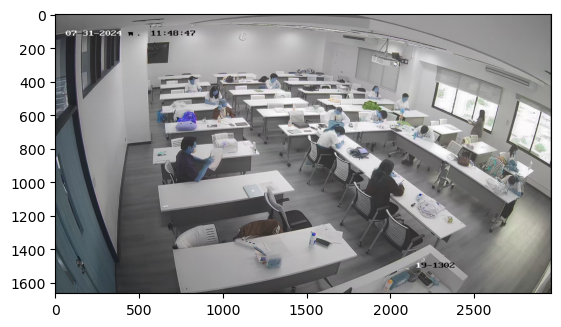

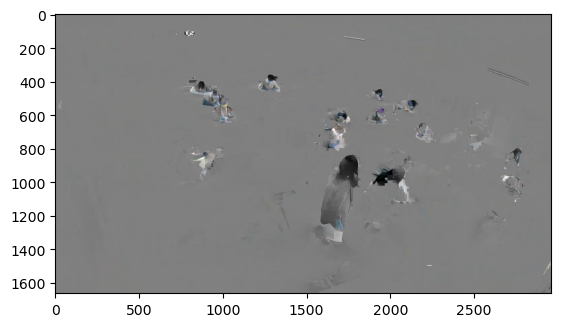

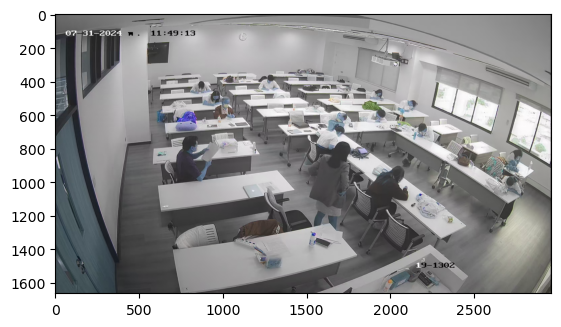

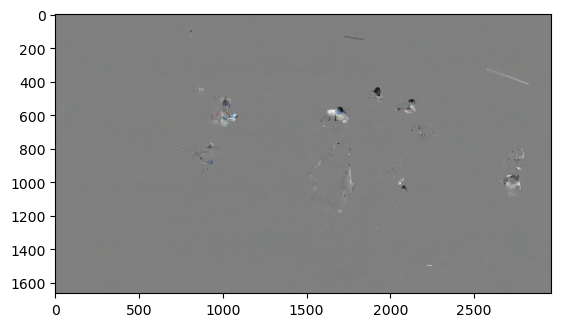

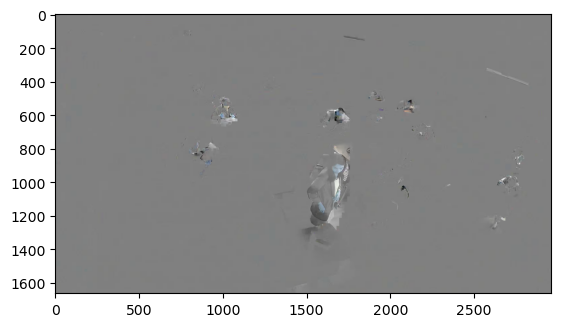

In [ ]:
frame_to_capture = list(range(0,500,Fxmin))
for frame_no in frame_to_capture:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    sleep(0.1)
    ret, frame = cap.read()
    plt.imshow(frame)
    plt.show()